# Problem 1

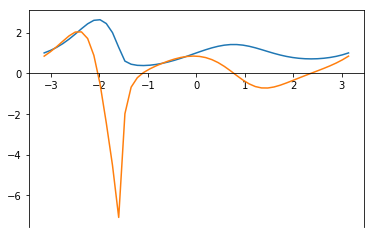

In [1]:
import sympy as sy
import numpy as np

def f(x):
    return (sy.sin(x)+1)**(sy.sin(sy.cos(x)))

x=sy.symbols('x')
f_der=sy.lambdify(x,sy.diff(f(x)))
K=50
xx=np.linspace(-np.pi,np.pi,K)
y11=np.zeros((K,1))
y12=np.zeros((K,1))
for i in range(K):
    y11[i]=f(xx[i])
    y12[i]=f_der(xx[i])
    
from matplotlib import pyplot as plt
ax=plt.gca()
ax.spines["bottom"].set_position("zero")
plt.figure(1)
plt.plot(xx,y11)
plt.plot(xx,y12)
plt.show()


# Problem 2

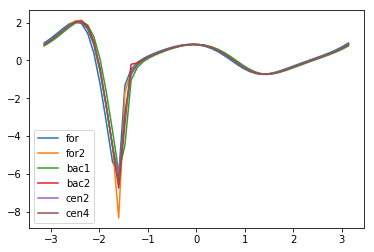

In [2]:
import sympy as sy
import numpy as np

def f(x):
    return (np.sin(x)+1)**(np.sin(np.cos(x)))

def der_for_1(f,x,h):
    return (f(x+h)-f(x))/h

def der_for_2(f,x,h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

def der_bac_1(f,x,h):
    return (f(x)-f(x-h))/h

def der_bac_2(f,x,h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

def der_cen_2(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)
    
def der_cen_4(f,x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
    
h=1e-1    
y21=np.zeros((K,1))
y22=np.zeros((K,1))
y23=np.zeros((K,1))
y24=np.zeros((K,1))
y25=np.zeros((K,1))
y26=np.zeros((K,1))
for i in range(K):
    y21[i]=der_for_1(f,xx[i],h)
    y22[i]=der_for_2(f,xx[i],h)
    y23[i]=der_bac_1(f,xx[i],h)
    y24[i]=der_bac_2(f,xx[i],h)
    y25[i]=der_cen_2(f,xx[i],h)
    y26[i]=der_cen_4(f,xx[i],h)
    
#ax=plt.gca()
#ax.spines["bottom"].set_position("zero")
plt.figure(2)
plt.plot(xx,y21)
plt.plot(xx,y22)
plt.plot(xx,y23)
plt.plot(xx,y24)
plt.plot(xx,y25)
plt.plot(xx,y26)
plt.legend(('for','for2','bac1','bac2','cen2','cen4'))
plt.show()


# Problemm 3

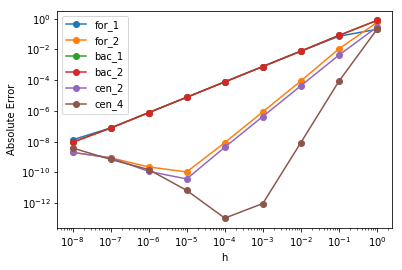

In [3]:
import sympy as sy
import numpy as np

x0=1
K=9
y31=np.zeros((K,1))
y32=np.zeros((K,1))
y33=np.zeros((K,1))
y34=np.zeros((K,1))
y35=np.zeros((K,1))
y36=np.zeros((K,1))
H=np.logspace(-8,0,K)
for i in range(K):
        y31[i]=np.abs(der_for_1(f,x0,H[i])-f_der(x0))
        y32[i]=np.abs(der_for_2(f,x0,H[i])-f_der(x0))
        y33[i]=np.abs(der_bac_1(f,x0,H[i])-f_der(x0))
        y34[i]=np.abs(der_bac_1(f,x0,H[i])-f_der(x0))
        y35[i]=np.abs(der_cen_2(f,x0,H[i])-f_der(x0))
        y36[i]=np.abs(der_cen_4(f,x0,H[i])-f_der(x0))
        
plt.figure(3)        
plt.loglog(H,y31,marker='o')
plt.loglog(H,y32,marker='o')
plt.loglog(H,y33,marker='o')
plt.loglog(H,y34,marker='o')
plt.loglog(H,y35,marker='o')
plt.loglog(H,y36,marker='o')  
plt.legend(("for_1","for_2","bac_1","bac_2","cen_2","cen_4"))      
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.show()

# Problem 5

In [5]:
import sympy as sy
import numpy as np

def Jac_num(f,x,h,n,m):
    I=np.eye(n)
    J=np.zeros((m,n))
    for i in range(m):
        J[:,i]=(f(np.array(x)+h*I[:,i])-f(np.array(x)-h*I[:,i]))/(2*h)
    return J
        
def f(x):
    y=np.zeros(2)
    y[0]=x[0]**2
    y[1]=x[0]**3-x[1]
    return y
x0=[1,2]
Jac_cen=Jac_num(f,x0,.001,2,2)

Jac_analy=np.array([[2*x0[0],0],[3*x0[0],-1]])

# Problem 6

C:\Anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


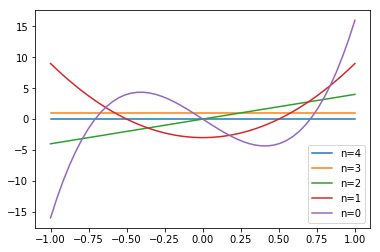

In [6]:
import sympy as sy
import numpy as np

from autograd import numpy as anp
from autograd import elementwise_grad as grad

def cheb_pol(x,n):
    #T=anp.zeros((n+1,1),dtype=float)
    #T[0]=1.    
    T=1.
    if n==0:
        return T#[0]
    else:
        #x=np.array(x,dtype=float)
        T=np.hstack((T,x)) 
        #T[1]=x
        for i in range(2,n+1,1):
            #T[i]=2*x*T[i-1]-T[i-2]
            T=np.hstack((T,2*x*T[i-1]-T[i-2])) 
        return T    
    
def cheb_pol_n(x,n):    
        T=cheb_pol(x,n)
        if hasattr(T, "__len__"):
            return T[-1]
        else:
            return T
h=.001
N=anp.linspace(0,4,5,dtype=int)
X5=anp.linspace(-1,1,50)
Y5=anp.zeros((50,5))
Y5_ag=anp.zeros((50,5))
for j in range(5):  
    def f(y):
        return cheb_pol_n(y,N[j])
    for i in range(50):
        Y5[i,j]=der_cen_2(f,X5[i],h)
        #g=lambda x: f(x)
        g_grad=grad(f)
        Y5_ag[i,j]=g_grad(X5[i])
        
Y6=np.zeros((50,5))
Y6[:,0]=np.zeros((50))
Y6[:,1]=np.ones((50))   
for i in range(2,5,1):
    for j in range(50):
        TT=cheb_pol(X5[j],N[i])
        Y6[j,i]=2*TT[-2]+2*X5[j]*Y6[j,i-1]-Y6[j,i-2]
        
#x=sy.symbols('x')
#cheb_pol_Der=sy.lambdify(x,sy.diff(cheb_pol(x,n)))      
from matplotlib import pyplot as plt
plt.figure(4)
plt.plot(X5,Y5_ag[:,0])
plt.plot(X5,Y5_ag[:,1])
plt.plot(X5,Y5_ag[:,2])
plt.plot(X5,Y5_ag[:,3])
plt.plot(X5,Y5_ag[:,4])
plt.legend(('n=4','n=3','n=2','n=1','n=0'))
plt.show()